In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time


In [2]:
data=pd.read_excel("C:\\Users\\Shree\\Desktop\\CocaCola_Sales_Rawdata.xlsx")

In [3]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

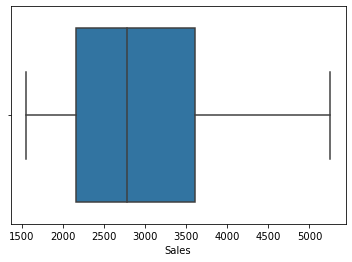

In [4]:
sns.boxplot('Sales',data=data)

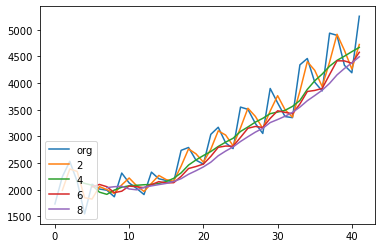

In [5]:
#moving average to understand time series
data.Sales.plot(label='org')
for i in range (2,10,2):
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

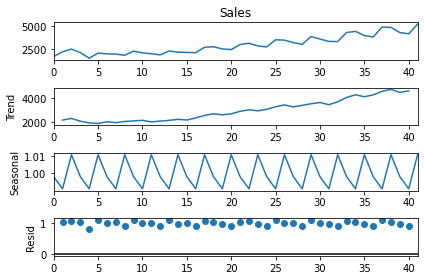

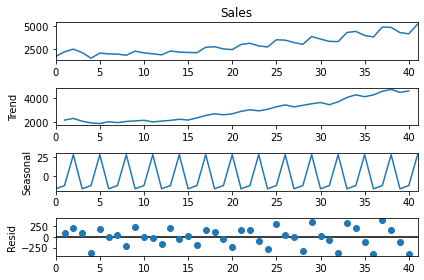

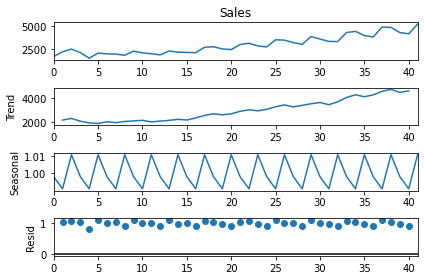

In [6]:
# time series decomposition plot
decompose_ts_add=seasonal_decompose(data.Sales,model="additive",period=3)
decompose_ts_add.plot()
decompose_ts_mul=seasonal_decompose(data.Sales,model='multiplicative',period=3)
decompose_ts_mul.plot()

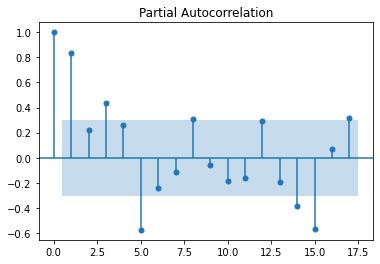

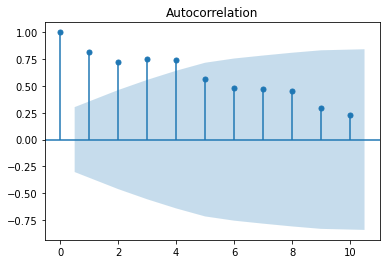

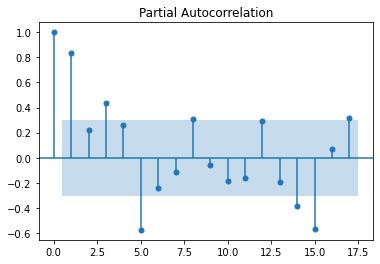

In [7]:
#ACF plot and pacfplot
tsa_plots.plot_acf(data.Sales,lags=10)
tsa_plots.plot_pacf(data.Sales)

In [8]:
#now we will seperate the data into train and test last 12 month as test and remainning as training data

In [9]:
train=data.head(48)
test=data.tail(12)

In [10]:
#calculate the mape value for test data

In [11]:
def MAPE (pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

In [12]:
#simple exponential method
ses_model=SimpleExpSmoothing(train['Sales']).fit()
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


9.765094286822912

In [13]:
#holt method
hw_model=Holt(train['Sales']).fit()
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Sales)

11.025182503719508

In [18]:
#holts winter exponential smoothing with additive seasonability and additive trend
hwe_model_add_add=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=4,damped=True).fit() 
pred_hwe_add_add=hwe_model_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_add_add,test.Sales)

C:\Users\Shree\AppData\Local\Temp/ipykernel_132/2362969377.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=4,damped=True).fit()


3.245837019668915

In [20]:
#holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=4).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

2.853976992162947

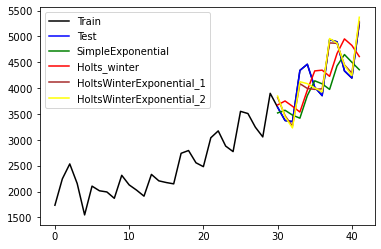

In [22]:
# visualisation of forecasted values for test data set using different methods
plt.plot(train.index,train['Sales'],label='Train',color='black')
plt.plot(test.index,test['Sales'],label='Test',color='blue')
plt.plot(pred_ses.index,pred_ses,label='SimpleExponential',color='green')
plt.plot(pred_hw.index,pred_hw,label='Holts_winter',color='red')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label='HoltsWinterExponential_1',color='brown')
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label='HoltsWinterExponential_2',color='yellow')
plt.legend(loc='best')